In [2]:
#Deep learning for image / handwritten digit recognition
#Using tensorflow

#Import tensorflow with MNIST data
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("data/MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images.shape

(55000, 784)

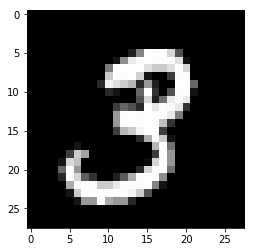

In [9]:
#Import visualisations and look at the data
import matplotlib.pyplot as plt
%matplotlib inline
mnist.train.images[1].shape #784 vector shape
plt.imshow(mnist.train.images[1].reshape(28,28),cmap="gist_gray") #transform to 28x28 image, original image

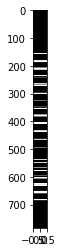

In [11]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap="gist_gray", aspect=0.02) #this is the input to the DL net

In [15]:
#Model data flow using the "manual" TF approach
x = tf.placeholder(tf.float32,shape=[None,784]) #None is placeholder for the batch size, 784 for the input vector size
W = tf.Variable(tf.zeros([784,10])) #10 possible numbers which becomes the weights
b = tf.Variable(tf.zeros([10])) #10 biases, one for each weight

In [16]:
y = tf.matmul(x,W) + b #model
y_true = tf.placeholder(tf.float32,shape=[None,10]) #shape 10 due to the one-hot encoding of the numbers

In [18]:
#Define cross entropy as the error to minimize in the gradient descent optimization, and choose optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [19]:
#Run the session
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init) #initialize variables
    #Stepwise on 1000 size sample, 100 batch size. Feed dict with pre-defined variables
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x, y_true:batch_y})
        
    matches = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1)) #calculate matches
    acc = tf.reduce_mean(tf.cast(matches,tf.float32)) #predict accuracy
    print(sess.run(acc,feed_dict={x:mnist.test.images, y_true:mnist.test.labels})) #

0.9186
